# ANN MODEL for EmployeeSatisfactionIndex Dataset
The Goal of this model is to predict satisfaction of employee based on differen factor like job level, rating, salary, etc.

# Importing Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing DATA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Final/EmployeeSatisfactionIndex.csv", sep=",", parse_dates=[0])
data

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [ ]:
# cehck column in data
data.columns

Index(['age', 'Dept', 'location', 'education', 'recruitment_type', 'job_level',
       'rating', 'onsite', 'awards', 'certifications', 'salary', 'satisfied'],
      dtype='object')

# Data Preprocessing

In [ ]:
# check null data
data.isnull().sum()

age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

##Normalization
Normalize numerical data

In [ ]:
data['age'] = data['age'].astype('int64')

In [ ]:
data_normalized = data[["age", "job_level", "rating", "onsite","awards", "certifications", "salary"]]

x_min = np.min(data_normalized)
x_max = np.max(data_normalized)

def normalization(x):
  return (x-x_min)/(x_max-x_min)

data_normalized = normalization(data_normalized)
data_normalized

,age,job_level,rating,onsite,awards,certifications,salary
0,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000
1,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673
2,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374
3,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410
4,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410
...,...,...,...,...,...,...,...
495,0.838710,0.25,1.00,0.0,0.666667,0.0,0.091410
496,0.032258,0.25,0.75,0.0,0.222222,0.0,0.091410
497,0.354839,0.00,0.50,0.0,0.222222,0.0,0.000000
498,0.096774,0.25,0.00,1.0,0.111111,1.0,0.091410


In [ ]:
data

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


##Drop Original Numerical and replace with Normalized Data

In [ ]:
data = data.drop(['age','job_level','rating','onsite','awards','certifications','salary'],axis=1)

data = data.join(data_normalized)
data

,Dept,location,education,recruitment_type,satisfied,age,job_level,rating,onsite,awards,certifications,salary
0,HR,Suburb,PG,Referral,1,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000
1,Technology,Suburb,PG,Walk-in,0,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673
2,Technology,Suburb,UG,Referral,0,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374
3,Sales,City,PG,On-Campus,1,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410
4,HR,City,UG,Recruitment Agency,1,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410
...,...,...,...,...,...,...,...,...,...,...,...,...
495,HR,Suburb,PG,On-Campus,1,0.838710,0.25,1.00,0.0,0.666667,0.0,0.091410
496,Technology,Suburb,UG,Referral,0,0.032258,0.25,0.75,0.0,0.222222,0.0,0.091410
497,Marketing,City,PG,On-Campus,1,0.354839,0.00,0.50,0.0,0.222222,0.0,0.000000
498,Technology,City,UG,On-Campus,0,0.096774,0.25,0.00,1.0,0.111111,1.0,0.091410


##Enconding and Hot-Encoding Process

In [ ]:
data.loc[data['location'] == 'City', 'location'] = 1
data.loc[data['location'] == 'Suburb', 'location'] = 0

data.loc[data['education'] == 'PG', 'education'] = 1
data.loc[data['education'] == 'UG', 'education'] = 0

data['location'] = data['location'].astype('int64')
data['education'] = data['education'].astype('int64')

categorical_var = ['Dept','recruitment_type']


# create dummy variables for all the other categorical variables

for variable in categorical_var:
# #     fill missing data
#     data[variable].fillna('Missing',inplace=True)
#     create dummy variables for given columns
    dummies = pd.get_dummies(data[variable],prefix=variable)
#     update data and drop original columns
    data = pd.concat([data,dummies],axis=1)
    data.drop([variable],axis=1,inplace=True)


data.head()

,location,education,satisfied,age,job_level,rating,onsite,awards,certifications,salary,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,0,1,1,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000,1,0,0,0,0,0,0,1,0
1,0,1,0,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673,0,0,0,0,1,0,0,0,1
2,0,0,0,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374,0,0,0,0,1,0,0,1,0
3,1,1,1,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410,0,0,0,1,0,1,0,0,0
4,1,0,1,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410,1,0,0,0,0,0,1,0,0


##Arrange Column Position

In [ ]:
#arrange column
column_to_move = data.pop("location")

# insert column with insert(location, column_name, column_value)

data.insert(14, "location", column_to_move)

In [ ]:
data.head()

,education,satisfied,age,job_level,rating,onsite,awards,certifications,salary,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,1,1,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000,1,0,0,0,0,0,0,0,1,0
1,1,0,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673,0,0,0,0,1,0,0,0,0,1
2,0,0,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374,0,0,0,0,1,0,0,0,1,0
3,1,1,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410,0,0,0,1,0,1,1,0,0,0
4,0,1,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410,1,0,0,0,0,1,0,1,0,0


In [ ]:
#arrange column
column_to_move = data.pop("education")

# insert column with insert(location, column_name, column_value)

data.insert(14, "education", column_to_move)

## Preparing Label and Target 

In [ ]:
data.head()

,satisfied,age,job_level,rating,onsite,awards,certifications,salary,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location,education,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,1,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000,1,0,0,0,0,0,1,0,0,1,0
1,0,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673,0,0,0,0,1,0,1,0,0,0,1
2,0,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374,0,0,0,0,1,0,0,0,0,1,0
3,1,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410,0,0,0,1,0,1,1,1,0,0,0
4,1,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
X = data.drop(['satisfied'], axis=1)
y = data.loc[:,data.columns == 'satisfied']
X

,age,job_level,rating,onsite,awards,certifications,salary,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location,education,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,0.161290,1.00,0.25,0.0,0.111111,0.0,1.000000,1,0,0,0,0,0,1,0,0,1,0
1,0.870968,0.50,1.00,1.0,0.222222,1.0,0.292673,0,0,0,0,1,0,1,0,0,0,1
2,0.645161,0.75,0.00,0.0,0.222222,0.0,0.664374,0,0,0,0,1,0,0,0,0,1,0
3,0.677419,0.25,0.50,1.0,0.000000,0.0,0.091410,0,0,0,1,0,1,1,1,0,0,0
4,0.322581,0.25,0.00,0.0,0.555556,0.0,0.091410,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.838710,0.25,1.00,0.0,0.666667,0.0,0.091410,1,0,0,0,0,0,1,1,0,0,0
496,0.032258,0.25,0.75,0.0,0.222222,0.0,0.091410,0,0,0,0,1,0,0,0,0,1,0
497,0.354839,0.00,0.50,0.0,0.222222,0.0,0.000000,0,1,0,0,0,1,1,1,0,0,0
498,0.096774,0.25,0.00,1.0,0.111111,1.0,0.091410,0,0,0,0,1,1,0,1,0,0,0


In [ ]:
y

,satisfied
0,1
1,0
2,0
3,1
4,1
...,...
495,1
496,0
497,1
498,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  500 non-null    float64
 1   job_level                            500 non-null    float64
 2   rating                               500 non-null    float64
 3   onsite                               500 non-null    float64
 4   awards                               500 non-null    float64
 5   certifications                       500 non-null    float64
 6   salary                               500 non-null    float64
 7   Dept_HR                              500 non-null    uint8  
 8   Dept_Marketing                       500 non-null    uint8  
 9   Dept_Purchasing                      500 non-null    uint8  
 10  Dept_Sales                           500 non-null    uint8  
 11  Dept_Technology                 

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

##Modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# for binary classification, its better to use sigmoid activation with 1 output layer
tf.random.set_seed(8)
model = tf.keras.Sequential([   
    tf.keras.layers.Flatten(input_shape=(18,), name="input_layer"),
    tf.keras.layers.Dense(32, activation='relu', name="hidden_layer"),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', name="hidden_layer_2"),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid', name="output_layer")
    ])

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 18)                0         
                                                                 
 hidden_layer (Dense)        (None, 32)                608       
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint

In [ ]:
# compiling model 
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["binary_accuracy"])

In [ ]:
# Hyperparameter Training and Setting Training
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=1e-1, patience=10, mode='min', cooldown=10, min_delta=0)
early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=10, mode='min', restore_best_weights=True)
callbacks_list = [early_stop, reduce_lr]
batch_size = 16

## Training Model

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=150,
                    callbacks=callbacks_list,
                    batch_size=batch_size
                    )

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.6963 - binary_accuracy: 0.5025 - lr: 0.0010
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6874 - binary_accuracy: 0.5400 - lr: 0.0010
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6809 - binary_accuracy: 0.5700 - lr: 0.0010
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - binary_accuracy: 0.5750 - lr: 0.0010
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6717 - binary_accuracy: 0.6050 - lr: 0.0010
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6000 - lr: 0.0010
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6175 - lr: 0.0010
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6601 - binary_accuracy: 0.6250 - lr: 0.0010
Epoch 9/150
25/25 [=============================

## Training Accuracy

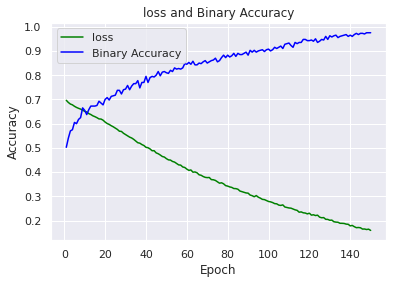

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

loss = history.history['loss']
bin_acc = history.history['binary_accuracy']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, loss, color='green', label='loss')
plt.plot(epochs, bin_acc, color='blue', label='Binary Accuracy')
plt.title('loss and Binary Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 3ms/step - loss: 1.3718 - binary_accuracy: 0.4700
test loss, test acc: [1.3717807531356812, 0.4699999988079071]


In [ ]:
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

predictions shape: (100, 1)
